<a href="https://colab.research.google.com/github/Gurnoor-coding/Gurnoor2/blob/project1/firstmodelimplementation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First ML Project

#Load Data Set



In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#Data Preperation

Seperate data into x and y

In [2]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [3]:
x = df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


##Data Spliting ##

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [5]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


#Model Building#

##Linear Regressions##

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [7]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)


In [8]:
print(y_lr_train_pred,y_lr_test_pred)

[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

EVALUATE Model

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)

lr_train_r2 = r2_score(y_train,y_lr_train_pred)


lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)



print('LR MSE Training',lr_train_mse)


LR MSE Training 1.0075362951093687


In [10]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test r2']

lr_results

,Method,Training MSE,Training R2,Test MSE,Test r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


##Random Forest##

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)

rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [16]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)



from sklearn.metrics import mean_squared_error, r2_score

rf_mse_train = mean_squared_error(y_train, y_rf_train_pred)
rf_mse_test = mean_squared_error(y_test,y_rf_test_pred)
rf_r2_train = r2_score(y_train, y_rf_train_pred)
rf_r2_test = r2_score(y_test,y_rf_test_pred)


rf_results = pd.DataFrame(['Random Forest', rf_mse_train,rf_r2_train,rf_mse_test,rf_r2_test]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test r2',]
rf_results


,Method,Training MSE,Training R2,Test MSE,Test r2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


#Model Comparison

In [24]:
df_models = pd.concat([lr_results,rf_results,clf_results])
df_models

,Method,Training MSE,Training R2,Test MSE,Test r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223
0,ML Regressor,1.146807,0.731953,1.16252,0.759866


In [25]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223
2,ML Regressor,1.146807,0.731953,1.16252,0.759866


#Data Visualization of results

Text(0.5, 0, 'Expiremental LogS')

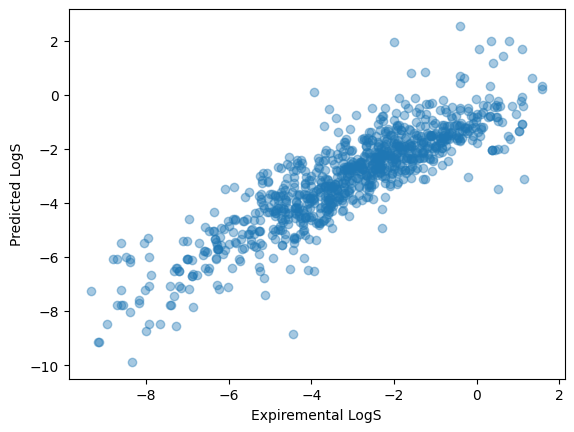

In [18]:
import matplotlib.pyplot as plt


plt.scatter(x=y_train,y=y_lr_train_pred,alpha=0.4)

plt.plot()
plt.ylabel('Predicted LogS')
plt.xlabel('Expiremental LogS')

Text(0.5, 0, 'Expiremental LogS')

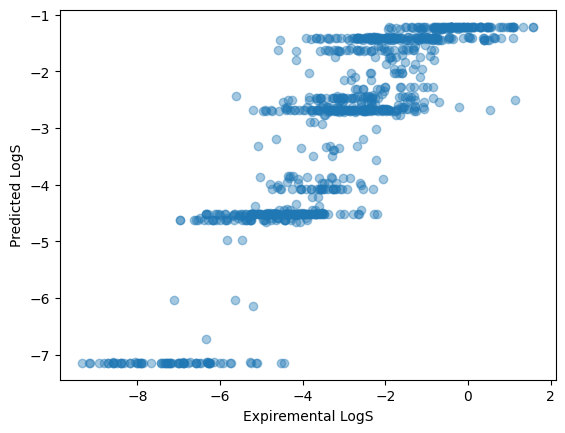

In [19]:
import matplotlib.pyplot as plt


plt.scatter(x=y_train,y=y_rf_train_pred,alpha=0.4)

plt.ylabel('Predicted LogS')
plt.xlabel('Expiremental LogS')

In [20]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes=(10,), random_state=1)
clf.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10,), random_state=1)

In [21]:
y_clf_pred_train = clf.predict(x_train)
y_clf_pred_test = clf.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
clf_mse_train = mean_squared_error(y_train,y_clf_pred_train)
clf_mse_test = mean_squared_error(y_test,y_clf_pred_test)

clf_r2_train = r2_score(y_train,y_clf_pred_train)
clf_r2_test = r2_score(y_test,y_clf_pred_test)



clf_results = pd.DataFrame(['ML Regressor', clf_mse_train,clf_r2_train,clf_mse_test,clf_r2_test]).transpose()
clf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test r2',]
clf_results

,Method,Training MSE,Training R2,Test MSE,Test r2
0,ML Regressor,1.146807,0.731953,1.16252,0.759866


Text(0.5, 0, 'Expiremental LogS')

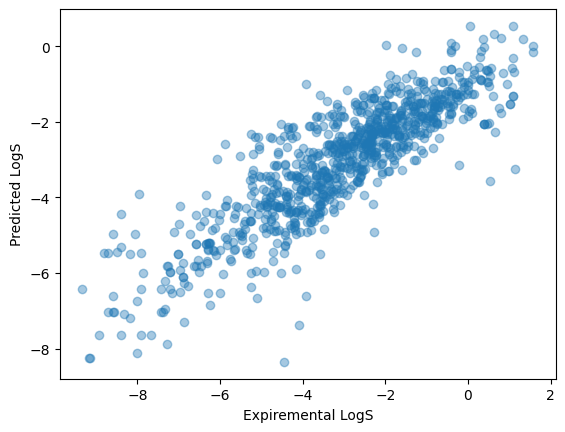

In [22]:
import matplotlib.pyplot as plt


plt.scatter(x=y_train,y=y_clf_pred_train,alpha=0.4)

plt.ylabel('Predicted LogS')
plt.xlabel('Expiremental LogS')
#Okay here the results for multi layer perceptron nueral network seems cool has a formula works fine

Linear regression models the relationship between independent and dependent variables using a linear equation.
It finds the best-fitting line by minimizing the residuals, allowing for predictions of the dependent variable based on new independent variable values.

Random Forest is a model that uses statistics and averages. I'll explain
what it does with the jellybean jar example. Lets say you have a jar of jellybeans, you want to preditct how many. You take 8 people and have them
surround the jellybean jar. Each of them gives you a guess based on their persepctive. You will often get inaccuarte answers, some too high or too low but if you take the avearge you will get a closer answer. Thats Random Forest. Its the principle but in actuallity its a decesion tree which I have not learned fully but I got a basic idea.

MLP Is a neural network with 10 layers of nuerons that uses a formula that I'm not smart enough to understand on wikipideia.

Its seems like linear regression was the best with r2 score of .76 training and .78 test meaning I got a 76 percent variance of dependents calclated on trained and 78 percent on test which I think is alright. I guess the conclusion is out of these three, linear regression worked the best for me. This was interesting, the data calculated the solubility of molecules.
MolLogP: The compound with water.
MolWt: Weight
NumRotatableBonds:flexibility with bonds.
These are all fUnctions calculating properties and I implented models to predict
them and see which one was the most accurrate in r2 and mse but to be fair this
has nothing to do with how accuratly they will actually work, its just a r2 test.

This was very neat for a first project on models. Google colab is pretty cool. Thought it was interesting to learn about molecule solubility even though I barely covered it and it was more about implementing, displaying, and evaluating models. Thanks google, stackoverflow, youtube, and copilot as well as scikit.org for the models and the the explanations of those models. Cool to use pandas for the first time and learn about mse and r2.